
# Rescale, resize, and downscale

`Rescale` operation resizes an image by a given scaling factor. The scaling
factor can either be a single floating point value, or multiple values - one
along each axis.

`Resize` serves the same purpose, but allows to specify an output image shape
instead of a scaling factor.

Note that when down-sampling an image, `resize` and `rescale` should perform
Gaussian smoothing to avoid aliasing artifacts. See the `anti_aliasing` and
`anti_aliasing_sigma` arguments to these functions.

`Downscale` serves the purpose of down-sampling an n-dimensional image by
integer factors using the local mean on the elements of each block of the size
factors given as a parameter to the function.


['Aphid', 'Black Rust', 'Blast', 'Brown Rust', 'Common Root Rot', 'Fusarium Head Blight', 'Healthy', 'Leaf Blight', 'Mildew', 'Mite', 'Septoria', 'Smut', 'Stem fly', 'Tan spot', 'Yellow Rust']


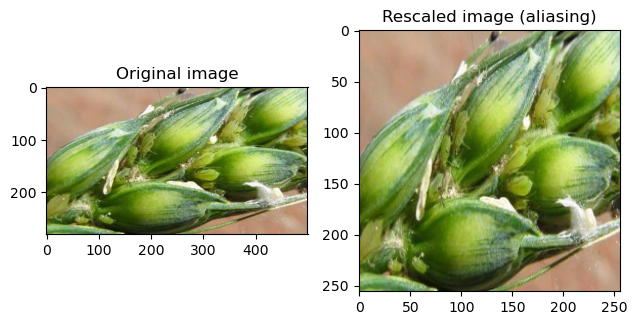

In [2]:
import os
import imageio.v2 as imageio
import matplotlib.pyplot as plt

from skimage import data, color
from skimage.transform import rescale, resize, downscale_local_mean
#train_dir = '../Dataset/plantvillage_dataset/color/'
train_dir = '../Dataset/data/train/'
target_dir = '../Dataset/wheat_scaled/target/'

datadirs = os.listdir(train_dir)
print(datadirs)
img = train_dir + datadirs[0]+ '/'+os.listdir(train_dir + datadirs[0])[1]
# Read the PNG image
image = imageio.imread(img)

image_resized = resize(
    image, (256, 256), anti_aliasing=True
)

# Get the pixel values as a numpy array


# Print the pixel values
fig, axes = plt.subplots(nrows=1, ncols=2)

ax = axes.ravel()

ax[0].imshow(image, cmap='gray')
ax[0].set_title("Original image")

ax[1].imshow(image_resized, cmap='gray')
ax[1].set_title("Rescaled image (aliasing)")





#ax[0].set_xlim(0, 512)
#ax[0].set_ylim(512, 0)
plt.tight_layout()
plt.show()

In [4]:
train_dir = '../Dataset/train_cleaned/train/'
target_dir = '../Dataset/train_cleaned_scaled/train/'
datadirs = os.listdir(train_dir)
for dir in datadirs:
    os.makedirs(target_dir + dir, exist_ok=True)

In [5]:
import numpy as np
train_dir = '../Dataset/train_cleaned/train/'
target_dir = '../Dataset/train_cleaned_scaled/train/'
datadirs = os.listdir(train_dir)
for j in range(len(datadirs)):
#for j in range(2):
    img_dirs = os.listdir(train_dir + datadirs[j])
    nameLen = len(datadirs[j])
    print(datadirs[j])
    for i in range(len(img_dirs)):
  #  for i in range(10):
        img = train_dir+datadirs[j]+"/"+img_dirs[i]
        num = img_dirs[i][nameLen+1:-4]
        #print(img_dirs[i])
        #print(f"{num:0>4}")
        name = img_dirs[i][:nameLen+1]+f"{num:0>4}"+".png"
        target_path = target_dir+datadirs[j]+"/"+name
        image = imageio.imread(img)

        image_resized = resize(
            image, (256, 256), anti_aliasing=False,preserve_range=True
        )
        image_resized = image_resized.astype(np.uint8)
        
        # try:
        imageio.imsave(target_path, image_resized) # Save the image
        # except OSError:
        #     fig, axes = plt.subplots(nrows=1, ncols=2)
        #     ax = axes.ravel()

        #     ax[0].imshow(image, cmap='gray')
        #     ax[0].set_title("Original image")

        #     ax[1].imshow(image_resized, cmap='gray')
        #     ax[1].set_title("Rescaled image (aliasing)")
        #     plt.tight_layout()
        #     plt.show()
            

Aphid
Black Rust
Brown Rust
Healthy
Mildew
Septoria
Smut
Stem fly
Tan spot
Yellow Rust


In [69]:
print(image_resized)

[[[192 156 130]
  [193 157 131]
  [192 156 130]
  ...
  [198 223 193]
  [211 230 175]
  [218 237 182]]

 [[193 157 131]
  [194 158 132]
  [193 157 131]
  ...
  [193 218 188]
  [215 233 184]
  [217 236 187]]

 [[194 158 132]
  [195 159 133]
  [194 158 132]
  ...
  [202 228 198]
  [205 228 183]
  [203 226 181]]

 ...

 [[ 84 131  30]
  [ 81 130  30]
  [ 82 134  36]
  ...
  [186 153 125]
  [187 151 125]
  [186 150 124]]

 [[ 89 136  31]
  [ 86 136  31]
  [ 88 140  37]
  ...
  [184 150 123]
  [186 150 124]
  [185 149 123]]

 [[103 151  42]
  [105 154  45]
  [104 156  48]
  ...
  [186 152 125]
  [185 149 123]
  [183 147 121]]]


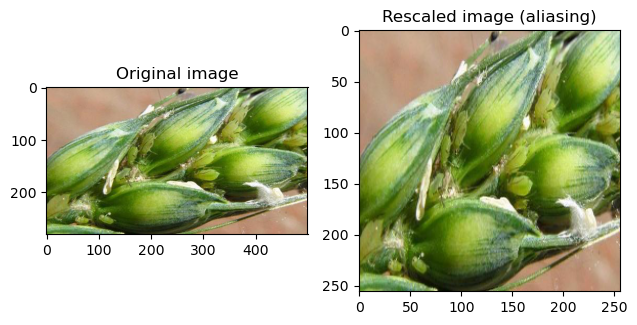

In [70]:
fig, axes = plt.subplots(nrows=1, ncols=2)

ax = axes.ravel()

ax[0].imshow(image, cmap='gray')
ax[0].set_title("Original image")

ax[1].imshow(image_resized, cmap='gray')
ax[1].set_title("Rescaled image (aliasing)")





#ax[0].set_xlim(0, 512)
#ax[0].set_ylim(512, 0)
plt.tight_layout()
plt.show()